In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Scatter Plot**

In [9]:
tv_hours = [3,5,2,0,5,3,1,4,3,4]
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]

# GPA: not ortalaması.

Graph a Scatter Plot with Matplotlib

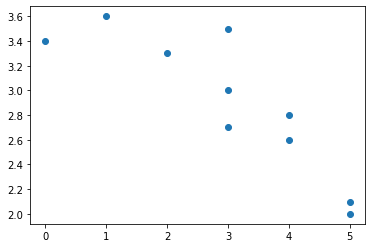

In [10]:
plt.scatter(tv_hours, GPA)

# scatter plot ile; ilk bakışta tv izleme saatleri ile not ortalaması arasında negatif bir ilişki olduğunu görsel olarak gördük.

# burada beklendiği gibi tv izleme saati arttıkça not ortalamasının düştüğünü gözlemliyoruz.

# yani bu iki verinin aralarında negatif bir ilişki mevcut. 

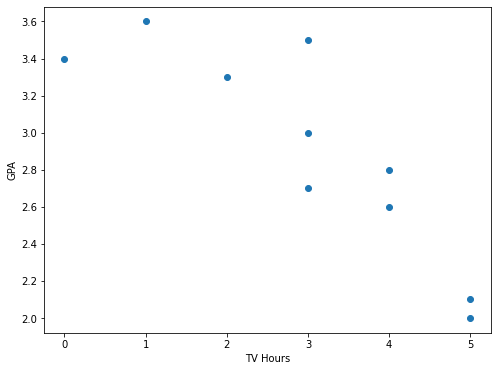

In [11]:
plt.figure(figsize=(8,6))
ax = plt.axes()
ax.scatter(tv_hours, GPA)
ax.set_xlabel("TV Hours")
ax.set_ylabel("GPA")
ax.axis("tight")
plt.show()

## Scipy

In [12]:
tv_hours = [3,5,2,0,5,3,1,4,3,4]
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]

# öncelikle bu iki listeyi numpy array'a dönüştüreceğiz

In [14]:
x = np.array(tv_hours)
y = np.array(GPA)

**Use Pearson Correlation Formula**

In [16]:
# E : toplam x, y yi nasıl yazarız?

len(x)*sum(x*y) - sum(x)*sum(y)  # pearson r (pearson correlation) formülünün payı

# değişkenlerimi niye arraya çevirdiğim şimdi daha iyi anlaşılıyor. 
# liste halinde kalsaydı iki listeyi çarpamazdımn ama arrayları çarpabiliyorum.

-71.00000000000011

In [17]:
np.sqrt((len(x)*sum(x**2)-sum(x)**2)*(len(y)*sum(y**2)-sum(y)**2))   # r'nin paydası

82.84926070883178

In [18]:
-71/82.84926   # pay/payda

# pearson correlation değerini yukarda tek tek hesaplama ile bulduk.

# negatif olarak kuvvetli bir şekilde correle olduğunu gördük. (-1 ve +1 max değerler)

-0.8569780828458817

**Scipy kullanarak pearson metodu ile korelasyon nasıl hesaplanır?**

In [19]:
r, p = stats.pearsonr(tv_hours, GPA) 

# pearson corelasyonunu stats.pearsonr() komutu ile kolayca bulabiliriz.

In [20]:
r

-0.8569780755138502

In [21]:
stats.spearmanr(GPA, tv_hours)

# bu da scipy'de spearmanr hesaplayan komut

SpearmanrResult(correlation=-0.8643457510060755, pvalue=0.001253729937570454)

Calculate Kendall's tau, a correlation measure for ordinal data.

Kendall's tau is a measure of the correspondence between two rankings.

**TR**
Ordinal veriler için bir korelasyon ölçüsü olan Kendall'ın tau'sunu hesaplayın.

Kendall'ın tau'su, iki sıralama arasındaki uyumun bir ölçüsüdür.

In [38]:
stats.kendalltau(tv_hours, GPA)  

# Bu da başka bir korelasyon hesaplama komutudur.

KendalltauResult(correlation=-0.7542472332656507, pvalue=0.0033968772424454747)

## Numpy'da covariance hesaplayın

In [22]:
np.cov(GPA, tv_hours)

# kovaryansı ve sample varyansı verir

array([[ 0.31777778, -0.78888889],
       [-0.78888889,  2.66666667]])

In [39]:
stats.tvar(GPA)

# stats.tvar() komutu bir verinin sample varyansını verir. 
# Burada GPA'nın sample varyansı bulduk. yukardaki satırda np.cov() komutu ile çıkan sonuçlardan birincisidir.


0.3177777777777777

In [40]:
np.var(GPA)

# np.var() komutu bir verinin popülasyon varyansını verir.

0.2859999999999999

In [41]:
stats.tvar(tv_hours)

# Burada  da tv_hours'un sample varyansı bulduk.

2.6666666666666665

**Calculate the correlation coefficients with Numpy**

In [33]:
np.corrcoef(tv_hours, GPA)

# np.corrcoef() komutu Pearson koralasyonunu verir.
    
# python default olarak pearson ile çalışır.

array([[ 1.        , -0.85697808],
       [-0.85697808,  1.        ]])

## Pandas ile

In [24]:
df = sns.load_dataset("car_crashes")

# üzerinde çalışmak üzere car_crashes data setini getirdim. 

In [25]:
df.head()

# datamın hangi verilerden oluştuğunu inceleyelim.

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [26]:
df.dtypes

# sütunlarımda hangi veri tipleri olduğunu inceliyorum.

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

In [27]:
df.describe()

# object ve string olanlar hariç sayısal olan tüm değişkenlerimin istatistiki bilgilerini inceliyorum.

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [28]:
df.corr()

# corelasyon matrisini veriyor. verilerimin birbiri arasındaki ilişkiyi veriyor.
# tabi python burda default olarak pearson yöntemi kullanıyor

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [29]:
df.corr().loc['total', 'no_previous']

0.9561791745723077

In [42]:
df.corr().iloc[0, 4]

# .iloc() metodu ile 0 ile 4. indeksteki satırların korelasyonuna baktım.

0.9561791745723077

In [ ]:
df["total"].corr(df["no_previous"])

In [43]:
df.corr().iloc[0:1, 4:5]

# .iloc() metodu ile satırlardan 0 indeks ve 4. indeski seçtim. bunların aralarındaki correlasyona baktım.

,no_previous
total,0.956179


In [30]:
df.corr("spearman")

# spearman'ı çok kullanmayacak olsak da burda dursun

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.559365,0.894576,0.877605,0.958206,-0.118070,-0.000045
speeding,0.559365,1.000000,0.642654,0.562876,0.541699,-0.052128,-0.065341
alcohol,0.894576,0.642654,1.000000,0.796959,0.856012,-0.122899,0.020679
not_distracted,0.877605,0.562876,0.796959,1.000000,0.798136,-0.112853,0.015340
no_previous,0.958206,0.541699,0.856012,0.798136,1.000000,-0.036969,0.003937
ins_premium,-0.118070,-0.052128,-0.122899,-0.112853,-0.036969,1.000000,0.646697
ins_losses,-0.000045,-0.065341,0.020679,0.015340,0.003937,0.646697,1.000000


<AxesSubplot:>

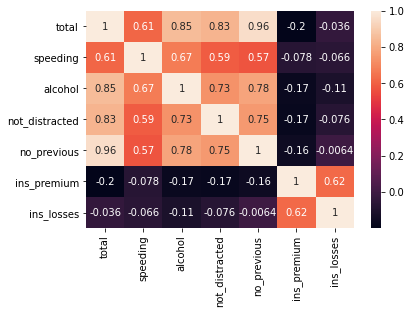

In [31]:
sns.heatmap(df.corr(), annot=True)

# heatmap(): Plot rectangular data as a color-encoded matrix

# heatmap ile korelasyon matrisimi görsel olarak daha iyi görebiliyorum. açık renkler kuvvetli korele..

<AxesSubplot:>

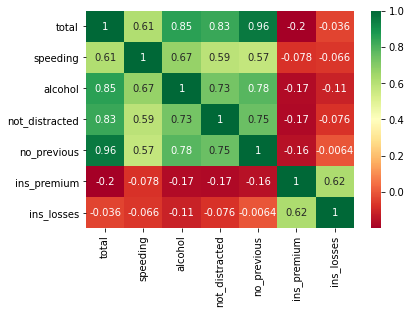

In [44]:
sns.heatmap(df.corr(), annot=True, cmap = "RdYlGn")

# renklendirme ile oynadım.

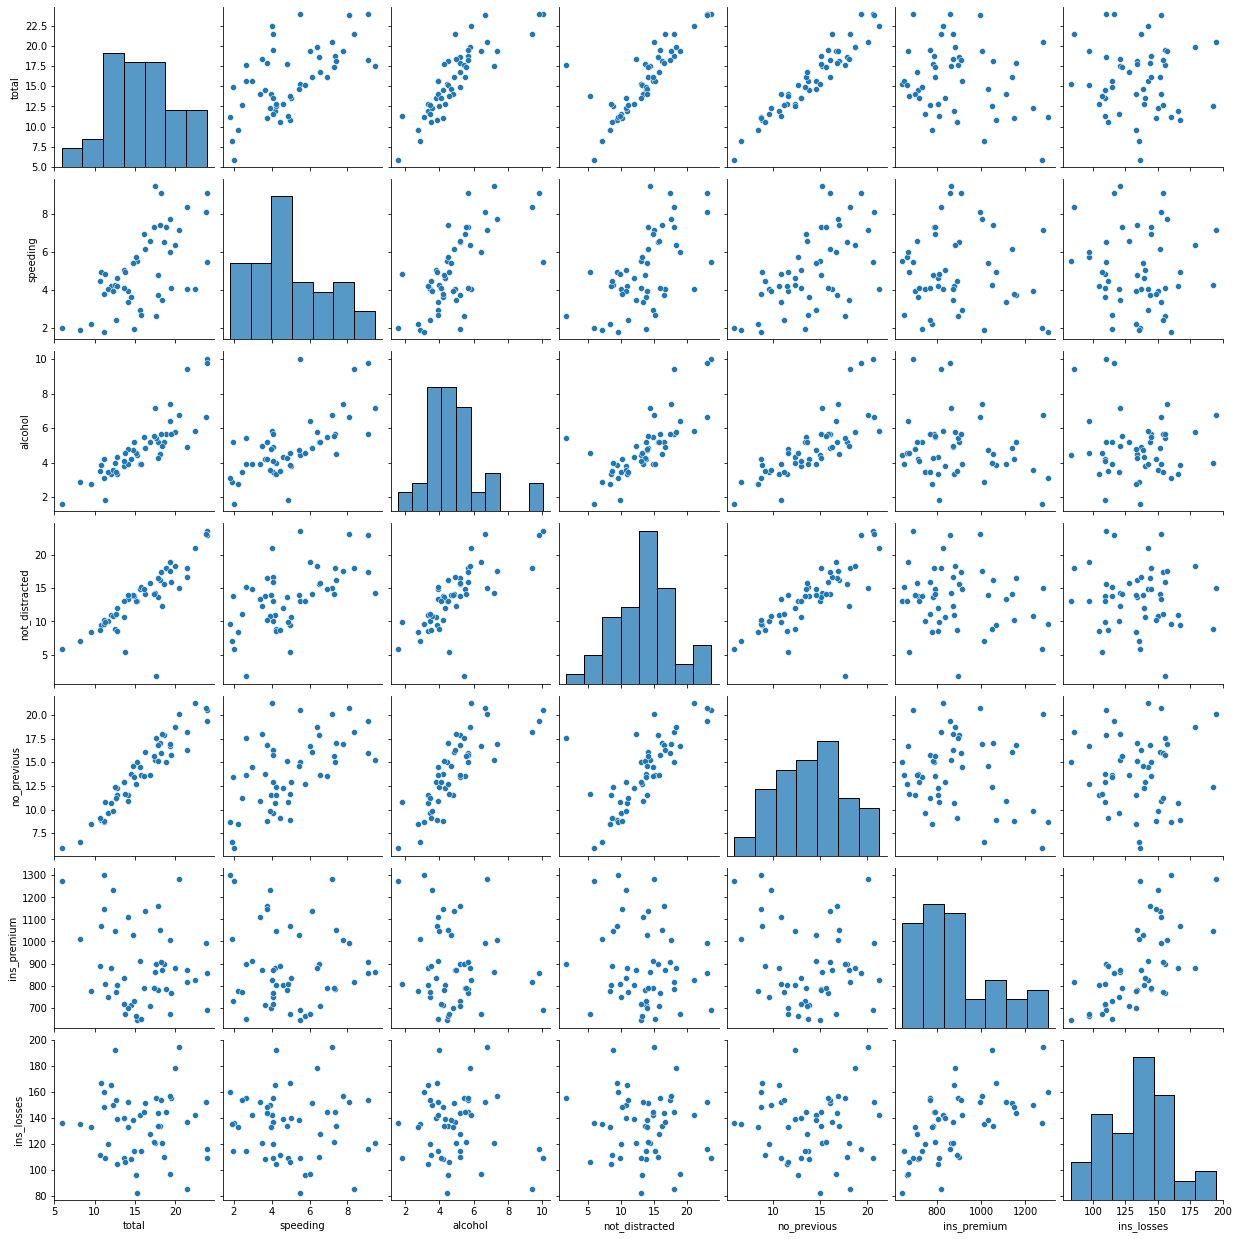

In [32]:
sns.pairplot(df)

# pairplot() ile verilerimin birbiri ile korelasyonunu scatter plotlar şeklinde görebiliyorum.